# **Batimiento o *Beats***
## Procesamiento de Imagen y Señal
### **ESCRIBE TU NOMBRE AQUI**
### Curso 2024-2025

In [1]:
import warnings
warnings.filterwarnings('ignore')

##

from IPython.display import Image, HTML, display
import IPython.display as ipd

from scipy import signal
from scipy.signal import spectrogram

import math

import soundfile as sf

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im

import librosa


#### Important tips

# To hear the signal
# ipd.Audio(x, rate=fs)

####

In [3]:
# Plot two,three and four images side by side

def plot2(s1, s2, c1=None, c2=None):
    image1 = im.imread(s1)
    image2 = im.imread(s2)

    fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,10))

    ax1.set_title(c1)
    ax1.imshow(image1)
    ax2.set_title(c2)
    ax2.imshow(image2)
    plt.show()

# **Definición**

El batimiento (*beat*, pulsación, aspereza, disonancia o batido) es un fenómeno acústico que se genera al interferir entre sí dos ondas sinusoidales con frecuencias ligeramente distintas.

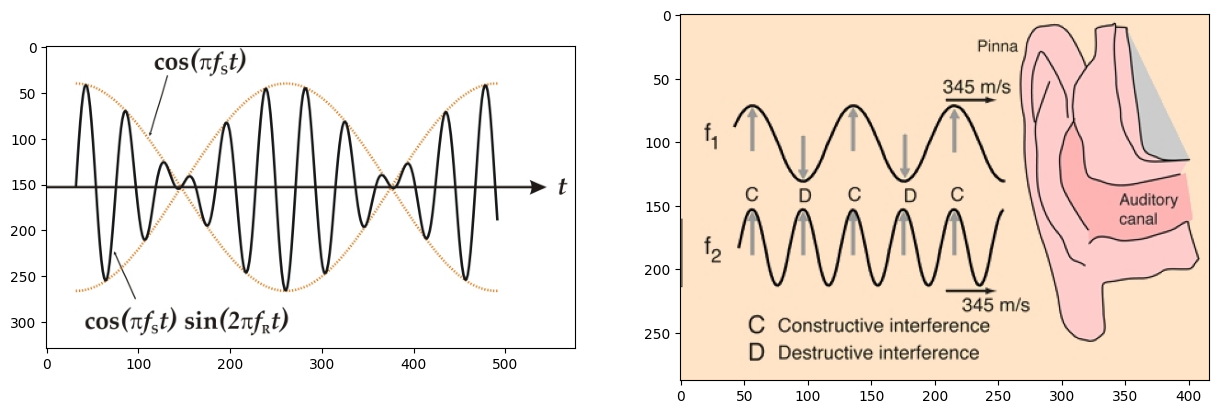

In [4]:
plot2("images/beat00.jpg", "images/beat01.jpg")


La frecuencia de batimiento es la diferencia de las frecuencias de las dos ondas: 

$$f_{beat}=\left|f_{1}-f_{2}\right|$$

Por ejemplo, si se producen dos ondas simultáneamente de $400Hz$ y $406Hz$, la onda resultante se percibe como un sonido de $403Hz$ (promedio de las dos frecuencias) con una fluctuación de $6Hz$ (frecuencia de batimiento).

# **Tipos de batimientos**

Si las frecuencias de las ondas son muy cercanas hablaremos de un batimiento lento. En este caso, se percibe un trémolo (fluctuación periódica en la intensidad del sonido).

Si la frecuencia del batimiento se encuentra dentro del registro audible, nos encontramos con un batimiento rápido que se percibe como un nuevo sonido a la frecuencia de batimiento pero con baja intensidad. 

Es interesante hacer notar que esa nueva frecuencia, el batimiento propiamente dicho, no es real sino que es un falso sonido generado por el propio cerebro. Por eso se dice que el batimiento no es un fenómeno acústico sino **psicoacústico**.

## Batimiento lento

Si con un instrumento se genera una nota **la4** que equivale a $440Hz$, y con otro instrumento de afinación no fija se genera simultáneamente una nota **la** ligeramente desafinada, por ejemplo a $438Hz$, como resultado oiremos una nota **la**, con una frecuencia igual al promedio de ambas (en este ejemplo, $439Hz$), con una variación periódica en su amplitud (trémolo) de: 

$$f_{beat}=440Hz-438Hz=2Hz$$

El mínimo de desafinación que un oído humano entrenado puede discriminar es un `savart` ($0.00231$ de semitono), que equivale a $4cents$ (centésima “logarítmica” de semitono).

Es decir, en cada período, la amplitud de la onda sonora resultante se anula dos veces (debido a las cancelaciones de fase producidas por la interferencia mutua entre las dos ondas acústicas). 

Por lo tanto, en el ejemplo anterior el sonido aparece y desaparece al doble de la frecuencia de batimiento, es decir, a $2Hz$ (o sea dos veces por segundo).

## Batimiento rápido

Cuando el batimiento es muy rápido y se encuentra dentro del registro audible de frecuencias de los humanos (aproximadamente $20Hz$), pero no llega a ser mayor que el ancho de la banda crítica correspondiente (momento en el cual se empiezan a oír los dos sonidos por separado), el cerebro humano lo percibe como una frecuencia muy grave. Esta frecuencia es la diferencia de las dos ondas que interactúan.

# **Aplicaciones del batimiento**

El batimiento suele emplearse en la afinación de instrumentos musicales como, por ejemplo, en la afinación de una guitarra (al pulsar dos cuerdas de frecuencias parecidas).

Los guitarristas hacen sonar la cuerda que quieren afinar al aire (es decir, sin pisar ningún traste) a la vez que hacen sonar la misma nota en otra cuerda, la cual toman de referencia.

Los técnicos afinadores de pianos utilizan los batimientos como referencia para lograr que todas las teclas del piano queden templadas de acuerdo con el “temperamento igual”. 

Algunos compositores de música contemporánea instrumental del siglo XX, como [**Giacinto Scelsi**](http://en.wikipedia.org/wiki/Giacinto_Scelsi), utilizaron el batimiento de frecuencias para explorar la cercanía entre ritmo y frecuencia y la microtonalidad en las cercanías de un tono o microintervalos.

<center>

| [**link1**](https://symposium.music.org/index.php/57/item/11365-composing-a-sound-giacinto-scelsi-s-l-ame-ailee-l-ame-ouverte-for-violin-solo) | [**link2**](https://danielcampbell.ca/analysis-of-ohoi-giacinto-scelsi/) |
|--------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------|

</center>

El batimiento ha sido muy utilizado en la música electroacústica desde sus inicios a partir de osciladores e incluso en la música electrónica experimental al igual que en varias obras de arte sonoro.

<hr style="border: 1px solid green" />

#### Ejemplo

Este fenómeno se produce cuando se unen dos ondas seno cuyas frecuencias difieren en una frecuencia ($bps$). Si $bps$ es menor que el rango del alcance auditivo humano ($< 10$), escuchamos los pulsos de forma individual. Si $bsp$ es mayor (y un divisor de la frecuencia) podemos escuchar un tono con una frecuencia de $bps$ Hz (aunque no exista una sinusoide explícita). Esto es debido a que "algo" se está repitiendo en ese rango.

Nótese que la unión de dos sonidos es la superposicion de ambos, y matemáticamente, la superposición es exactamente una "interferencia". Los ***beats*** se producen por la alternación regular de interferencias constructivas y destructivas.

* Vamos a generar dos ondas seno de $4$ segundos cuyas frecuencias son $400Hz$ y $405Hz$ respectivamente y la frecuencia de muestreo de ambas ondas es $16000Hz$.

In [5]:
# Genera las ondas
frec    = 400   # Frecuencia base (en Hz)
fs      = 16000 # Sampling rate
sd_bits = 16    # Sample depth
secs    = 4.0   # Longitud de cada nota

t = np.linspace(0, secs, fs) # Instantes de tiempo donde crearemos las muestras
bps = 5.0 # Frecuencia de batimiento (en Hz)

# Onda seno con frecuencia base y onda con batimiento
onda_lo = np.sin(2*np.pi * frec * t)            # Señal 1 (400Hz)
onda_hi = np.sin(2*np.pi * (frec + bps) * t)    # Señal 2 (405Hz)

# Las dos ondas juntas
onda_lo_hi = onda_lo + onda_hi

# Silencio
pausa = np.repeat(0, 0.5*fs)

* Una vez obtenidas ambas ondas, las sumaremos y obtenemos la siguiente secuencia:

<center>

<hr style="border: 1px solid blue" />

**Tono bajo (400 Hz) - silencio (pausa) - Tono más alto (405 Hz) - silencio (pausa) - La suma de ambos tonos**

<hr style="border: 1px solid blue" />

</center>

Podemos utilizar una resolución de $16$ bits.

In [7]:
# Genera la secuencia
# Tono bajo, pausa, Tono mas alto, pausa, ambos tonos juntos
secuencia = np.concatenate([onda_lo, pausa, onda_hi, pausa, onda_lo_hi])

* Visualizamos el oscilograma y el espectrograma de todos los audios generados (por separado y la secuencia final). Y finalmente, oímos la secuencia final. 

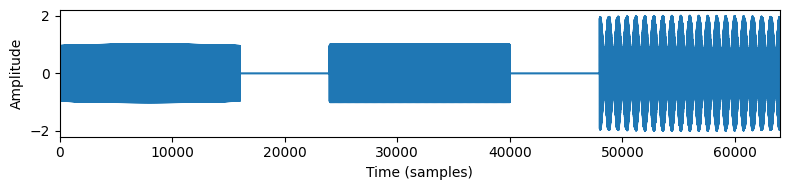

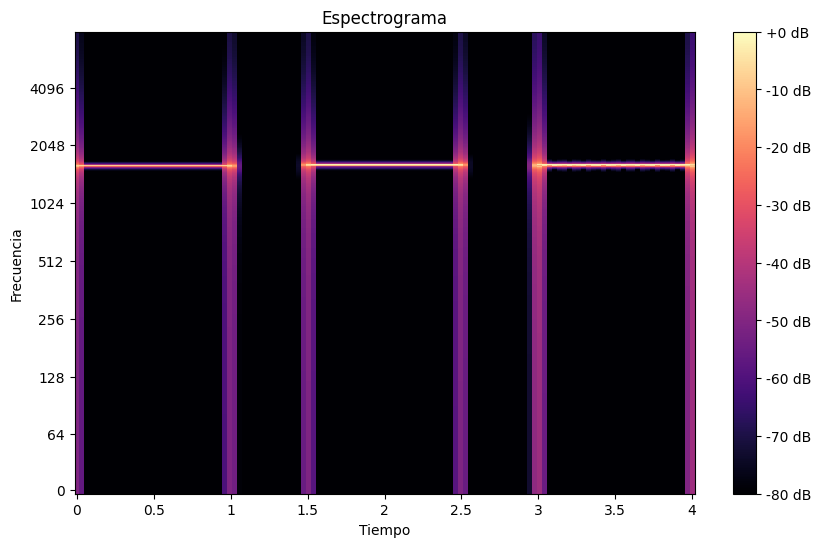

In [19]:
# Visuzaliza los oscilogramas (algunos segundos) y los espectrogramas
plt.figure(figsize=(8, 2))
plt.plot(secuencia)
plt.xlim([0, secuencia.shape[0]])
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.tight_layout()


# Graficar el espectrograma
S = librosa.stft(secuencia) # Espectrograma con STFT
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, sr=fs, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format="%+2.0f dB")
plt.title("Espectrograma")
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")
plt.show()


In [18]:
# Oye la secuencia final
ipd.display(ipd.Audio(data=secuencia, rate=fs))

---

# **Referencias**

[**wikipedia *Beat***](http://en.wikipedia.org/wiki/Beat_%28acoustics%29)

[**Superposición de ondas**](http://www.acs.psu.edu/drussell/Demos/superposition/superposition.html)

[***Acoustics* FAQ**](http://newt.phys.unsw.edu.au/jw/musFAQ.html)

[***Interference beats and Tartini tones***](http://www.animations.physics.unsw.edu.au/jw/beats.htm)

[***Beat Frequencies in Sound***](http://www.school-for-champions.com/science/sound_beat_frequencies.htm)

[**Afinación de un piano**](http://es.wikipedia.org/wiki/Afinaci%C3%B3n_del_piano)

[**Batimiento como técnica en la música electroacústica y el arte sonoro**](https://es.wikipedia.org/wiki/Batimiento#Batimiento_como_t%C3%A9cnica_en_la_m%C3%BAsica_electroac%C3%BAstica_y_el_arte_sonoro)